In [231]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [232]:
def read_images(path):
    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (96,96))
    return img.astype(float)

(96, 96)

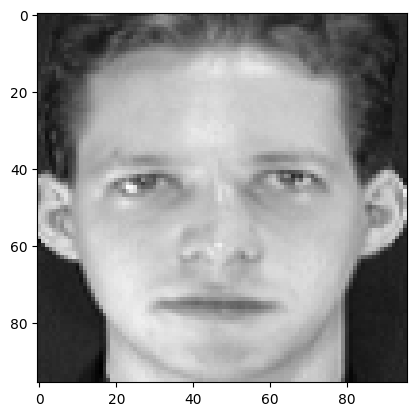

In [233]:
img = read_images('train/s1.1.tif')
plt.imshow(img, cmap='gray')
img = img.astype(float)
shape = img.shape
shape

In [234]:
def get_stacked_images(dir):
    image_array = []
    for i in range(1,41):
        path = dir+'s'+str(i)+'.1.tif'
        img = read_images(path)
        image_array.append(img.flatten())

    stacked_images = np.stack(image_array, axis=1)
    return stacked_images

In [235]:
def get_eigen_vector(covariance_matrix):
    eigen_vector, eigen_values, _ = np.linalg.svd(covariance_matrix)
    return eigen_vector, eigen_values

In [248]:
def get_eigen_projection(centered_image, eigen_vector, k):
    projection_values = np.dot( centered_image.T, eigen_vector[:,:k])
    return projection_values

In [249]:
def reconstruct_images():


SyntaxError: unexpected EOF while parsing (1735852410.py, line 2)

In [250]:
stacked_images = get_stacked_images('train/')
mean_image = np.mean(stacked_images, axis=1).reshape(-1,1)
centered_image = stacked_images - mean_image
covariance_matrix = np.cov(centered_image)

In [251]:
eigen_vector, eigen_values = get_eigen_vector(covariance_matrix)

In [252]:
weights = get_eigen_projection(centered_image, eigen_vector, 55)

In [253]:
centered_image.shape

(9216, 40)

In [254]:
weights.shape

(40, 55)